# Reading in netcdf

In [1]:
import cartopy

In [2]:
import xarray as xr

In [3]:
ds = xr.open_dataset("assets/data_2017_germany.nc")

In [4]:
#ds = xr.open_dataset("data_2017.nc")

# Annual yield

Note that the annual yield is normally derived by the annual sum and is provided in kWh/m²

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

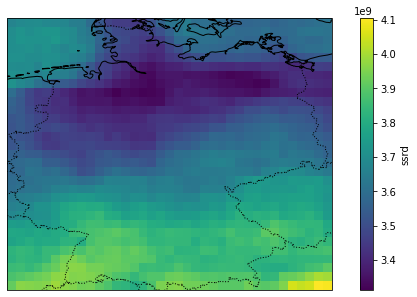

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # PlateCarree is a common projection

ds["ssrd"].sum("time").plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Variability

Perez, R., David, M., Hoff, T. E., Jamaly, M., Kivalov, S., Kleissl, J., ... & Perez, M. (2016). Spatial and temporal variability of solar energy

In [7]:
a = (ds["ssrd"]/ds["influx_toa"]).diff("time")

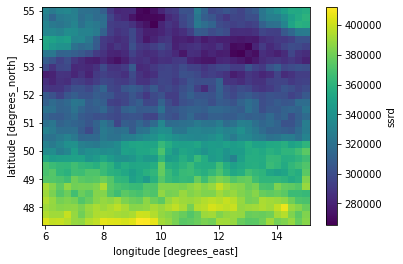

In [8]:
(ds["ssrd"]).diff("time").std("time").plot()

This measures the so-called variability as a metric for how variable solar radiation at this site is.

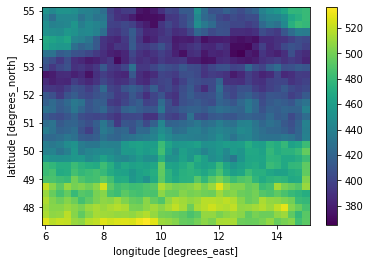

In [9]:
(ds["ssrd"]/ds["influx_toa"]).diff("time").std("time").plot()

This measures the so-called variability as a metric for the clear-sky index. The clear-sky index is the normalized irradiance/radiaton by the maximum possible amount. 